## Task 1 :Exploratory Data Analysis (EDA) on Retail Sales Data

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import seaborn as sns

## Loading data from CSV

Load data from the given CSV file.

In [2]:
data = pd.read_csv('retail.csv')

************************************************************************************************************
## Know your data

Let's chech some sample records to have a feel of data you are going to work with

In [3]:
#showing first 10 rows
data.head(10)

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
3,SO43843,"Mountain-100 Black, 44",Black,Bikes,Mountain Bikes,NaN,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,5,2024.9940,10124.9700,0.0,809.9976,253.1243
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297
5,SO43843,"HL Mountain Frame - Silver, 48",Silver,Components,Mountain Frames,1364.5000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,1,818.7000,818.7000,0.0,65.4960,20.4675
6,SO43843,"HL Mountain Frame - Black, 48",Black,Components,Mountain Frames,1349.6000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,Nan,809.7600,809.7600,0.0,64.7808,20.2440
7,SO43843,"Mountain-100 Silver, 38",Silver,Bikes,Mountain Bikes,3399.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997
8,SO43843,"Mountain Bike Socks, M",White,Clothing,Socks,9.5000,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,2,5.7000,11.4000,0.0,0.9120,0.2850
9,SO43843,"Mountain-100 Black, 42",Black,Bikes,Mountain Bikes,3374.9900,1/29/2011,2/10/2011,2/5/2011,No Discount,Central,3,2024.9940,6074.9820,0.0,485.9986,151.8746


Check the number of rows and columns that your dataset has:

In [4]:
#gives (num rows, num col)
data.shape

(32040, 17)

Check datatype of each attribute

In [5]:
data.dtypes

OrderNumber        object
ProductName        object
Color              object
Category           object
Subcategory        object
ListPrice         float64
Orderdate          object
Duedate            object
Shipdate           object
PromotionName      object
SalesRegion        object
OrderQuantity      object
UnitPrice         float64
SalesAmount       float64
DiscountAmount    float64
TaxAmount         float64
Freight           float64
dtype: object

Set the data types correctly...

In [6]:
data[["Orderdate", "Duedate", "Shipdate"]] = data[["Orderdate", "Duedate", "Shipdate"]].apply(pd.to_datetime)
data[["OrderQuantity"]] = data["OrderQuantity"].astype(float).astype('Int64')
data.dtypes

OrderNumber               object
ProductName               object
Color                     object
Category                  object
Subcategory               object
ListPrice                float64
Orderdate         datetime64[ns]
Duedate           datetime64[ns]
Shipdate          datetime64[ns]
PromotionName             object
SalesRegion               object
OrderQuantity              Int64
UnitPrice                float64
SalesAmount              float64
DiscountAmount           float64
TaxAmount                float64
Freight                  float64
dtype: object

How many distinct values does each column have?

In [7]:
data.nunique()

OrderNumber       1871
ProductName        250
Color                8
Category             4
Subcategory         33
ListPrice          103
Orderdate           17
Duedate             17
Shipdate            17
PromotionName        7
SalesRegion         10
OrderQuantity       37
UnitPrice          214
SalesAmount       1271
DiscountAmount     382
TaxAmount         1271
Freight           1266
dtype: int64

Use describe method to check basic statiscal measures of your data like count, mean, min, max, std quantiles etc

In [8]:
data.describe()

,ListPrice,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
count,32032.000000,32024.000000,32040.000000,32040.000000,32040.00000,32040.000000,32040.000000
mean,714.663419,3.626468,424.122103,1299.023131,8.15285,103.921849,32.475594
std,851.623778,3.116480,506.799303,2153.316625,78.40708,172.265331,53.832916
min,2.290000,1.000000,1.328200,1.374000,0.00000,0.109900,0.034400
25%,54.990000,2.000000,32.994000,125.964000,0.00000,10.077100,3.149100
50%,337.220000,3.000000,202.332000,445.410000,0.00000,35.632800,11.135300
75%,1079.990000,5.000000,647.994000,1457.820000,0.00000,116.625600,36.445500
max,3578.270000,40.000000,2146.962000,27893.619000,4005.23760,2231.489500,697.340500


# Data Cleaning

There are some error in the dataset that you need to fix:

How many null values are there in each columns?
    
    


In [9]:
data.isnull().sum()

OrderNumber          0
ProductName          0
Color             2967
Category             0
Subcategory          0
ListPrice            8
Orderdate            0
Duedate              0
Shipdate             0
PromotionName        0
SalesRegion         15
OrderQuantity       16
UnitPrice            0
SalesAmount          0
DiscountAmount       0
TaxAmount            0
Freight              0
dtype: int64

- Some of the products have Quantity as Null, you need to set their quantity to 1.

In [10]:
data['OrderQuantity'].fillna(1, inplace=True)

- Some of the products have Null List Price, set their price as the mean of that product price in other orders.
    

In [11]:
data.ListPrice = data.groupby('ProductName')['ListPrice'].apply(lambda x: x.fillna(x.mean()))
data.ListPrice = data.ListPrice.fillna(data.ListPrice.mean())

- Some orders do not have a sales region assigned, you need to remove such order lines

In [12]:
data = data[data['SalesRegion'].notna()]

- Some orders have Due date less than Order date, due date should be set as Order data in such cases.

In [13]:
data.loc[data['Orderdate'] > data['Duedate'] , 'DueData'] = 'OrderDate'

Do you feel there are outliers in the data? Let's eliminate extreme values (if any) in Order Sales Amount. 
Note: Extreme values can be seen as those outside +/- 3 standard deviation. 

Do you think this is wise to identify outliers this way?


In [14]:
# outliers = data[data['SalesAmount'] > (data['SalesAmount'].mean() + (3 * data['SalesAmount'].std()))] 
# outliers2 = data[data['SalesAmount'] < (data['SalesAmount'].mean() - (3 * data['SalesAmount'].std()))]
# outliers.append(outliers2)
# outliers.head()

#removing outliers from data:
print(data['SalesAmount'].mean(), data['SalesAmount'].std(), data['SalesAmount'].mean() - 3 * data['SalesAmount'].std(), data['SalesAmount'].mean() + 3 * data['SalesAmount'].std())
data = data[data['SalesAmount'] < (data['SalesAmount'].mean() + (3 * data['SalesAmount'].std()))] 
data = data[data['SalesAmount'] > (data['SalesAmount'].mean() - (3 * data['SalesAmount'].std()))]

1298.8642341233315 2153.181910775347 -5160.68149820271 7758.409966449373


#Do you think this is wise to identify outliers this way?

**Answer**:Even though the outliers that we have calculated above are only 2.47% of the data, but I dont think this is a wise way to find outliers as some of the outliers have sales amount very similar to those orders which are not being considered as outliers for example, orders with sales amount 7642.6382 are not being considered outliers, whereas those with sales amount of 7853.625 are being considered as outliers.
<br>
The sales amount depends on the price of the product. Some orders contain products are far more expensive than most of the products and hence they are being considered as outliers but if we closely analyze those orders, they are not deviating from other orders in terms of the quantity of products ordered for example orders with sales amount upto 8000 still have 4-6 bikes and the mean is 3.6. However past the \\$8500 point, order quantity becomes very high going to more than 10, so these should be considered as outliers.

# Data Exploration

Check how many products have been sold under each category.

In [15]:
data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()

,Category,OrderQuantity
0,Accessories,14355
1,Bikes,31987
2,Clothing,35549
3,Components,28148


Draw boxplot of cateogry vs product list price to compare prices of products across categories.

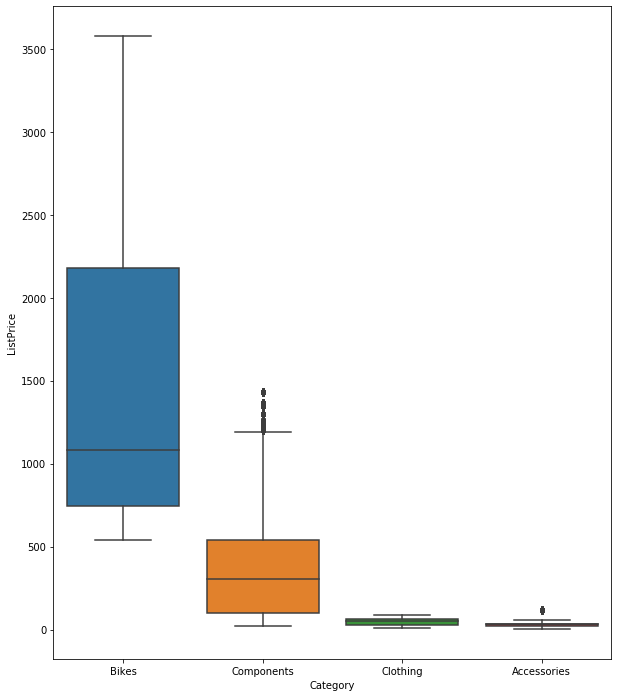

In [16]:
plt.figure(figsize =(10, 12)) 
sns.boxplot(y= data['ListPrice'], x = data['Category'])

**Analysis**:The box plot shows that List Price of Bikes is very high compared to the rest of the categories. This makes sense because the price of bikes would be a lot more than accessories and clothes. We can also see that the bike List price is positively skewed. This means that most of the bike prices are more than the median price. 

Plot bar chart and pie chart to see total sales of products in each category.

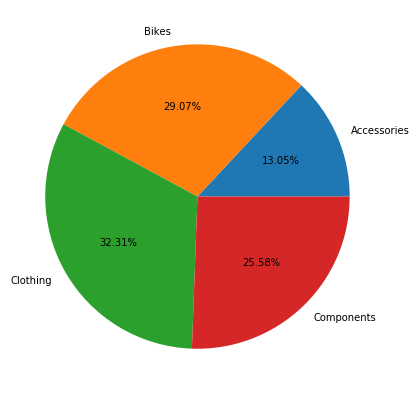

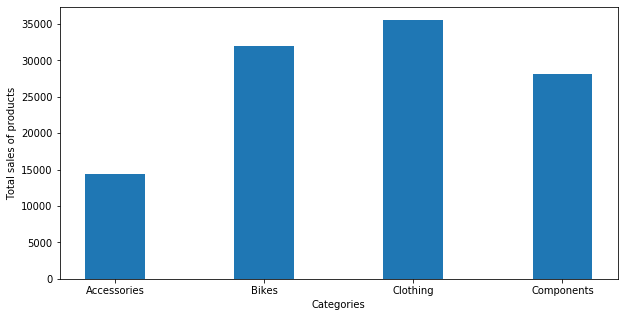

In [17]:
df = data.groupby(['Category']).agg({'OrderQuantity':np.sum}).reset_index()
fig1 = plt.figure(figsize =(10, 7)) 
plt.pie(df.OrderQuantity, labels = df.Category,autopct='%1.2f%%')
# show plot 
plt.show() 

fig2 = plt.figure(figsize = (10, 5)) 
plt.bar(df.Category, df.OrderQuantity, width = 0.4)
plt.xlabel("Categories") 
plt.ylabel("Total sales of products")  
# show plot 
plt.show() 

**Analysis**:As can be observed from the charts, the highest number of products sold come from Clothing category followed by Bikes then components and then Accessories with the least number of products sold.

---------------------------------------------
Plot histogram of all numeric attrubites to see their distribution

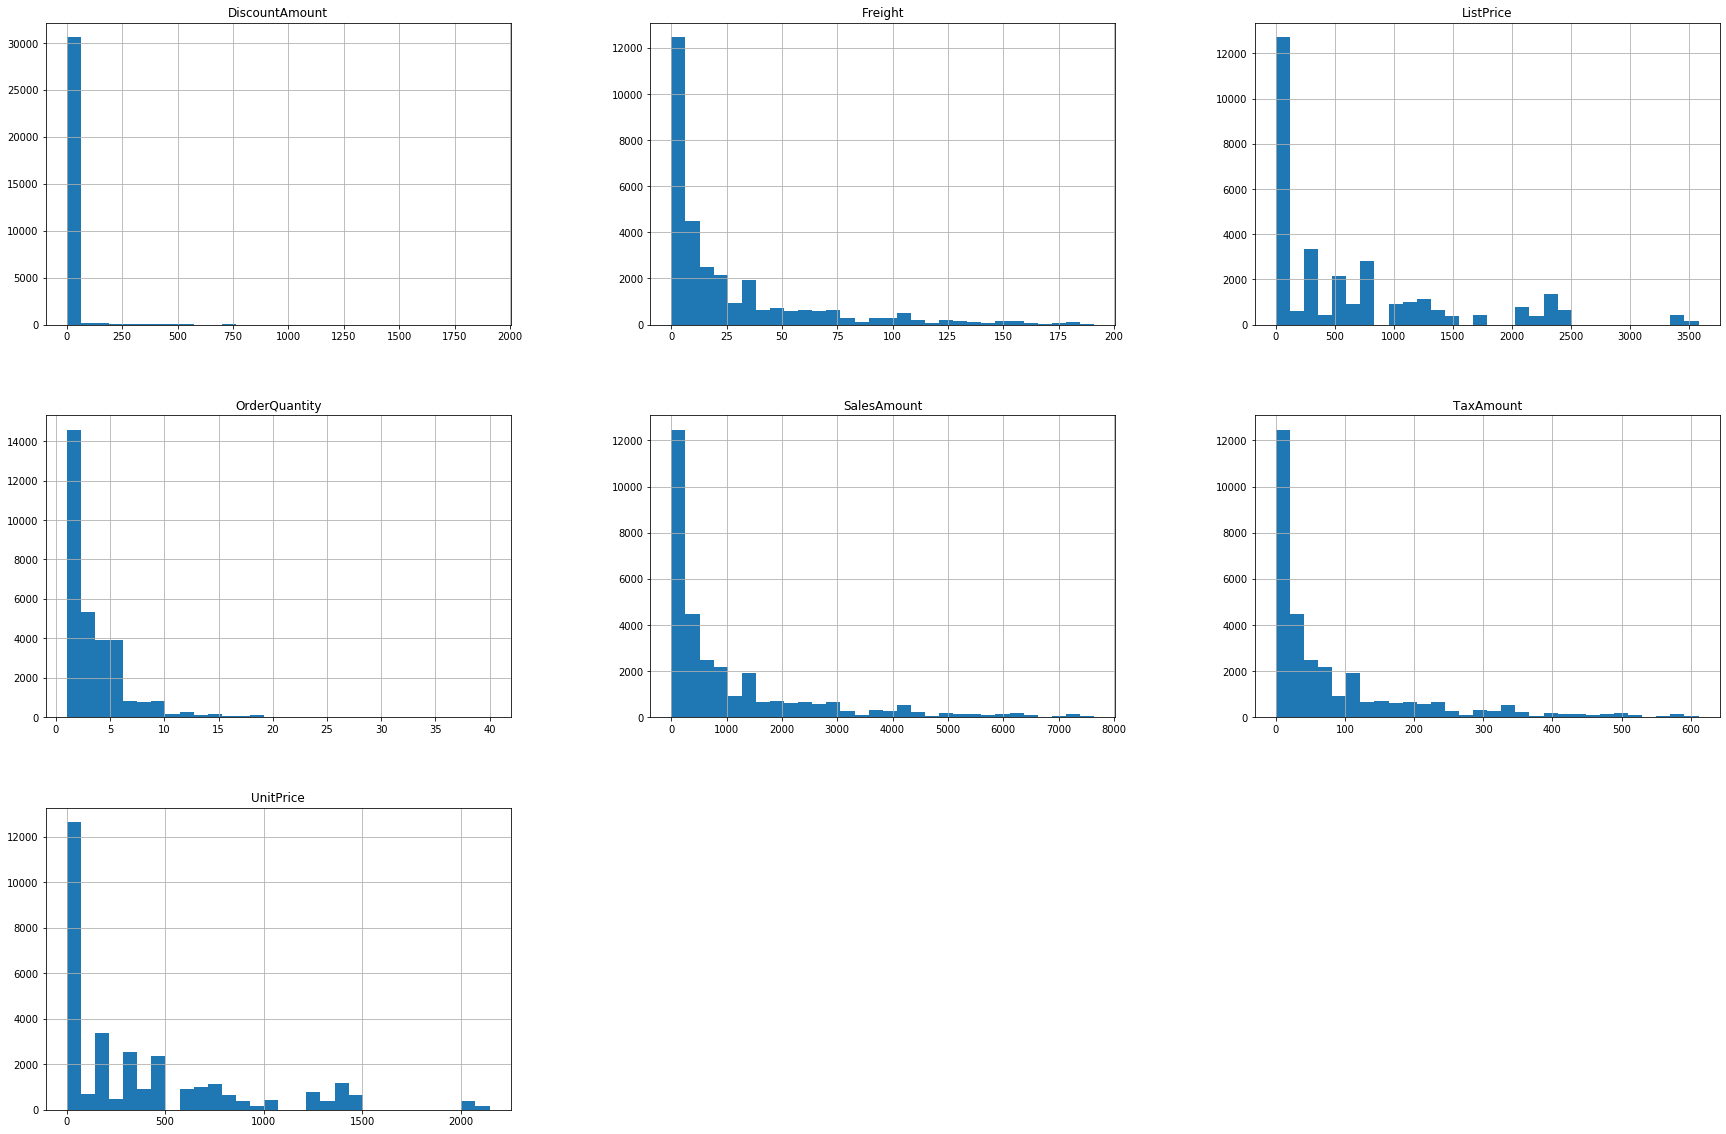

In [18]:
# Plot the histograms of each 
data.hist(bins=30, figsize=(30,20))
plt.show()

**Analysis**:From the above histograms we can make some conclusions:
1. Most of the Products have been ordered without any discount i.e. at full price.
2. Most of the orders have a very low freight amount charged. 
3. The list Price and Unit Price are following the same pattern. The prices are also very similar in both histograms. 
4. Most of the orders have 1-2 products of each kind. Many orders also have upto 7 same products but more than that is quite rare.
5. Sales amount, tax amount and Freight are following the same trends and most of the orders have comparatively low sales amount (less than $1000) and hence low tax amount and freight applied on them.


Plor bar chart for categorial attributes Category, SubCategory, Promotion and Region.

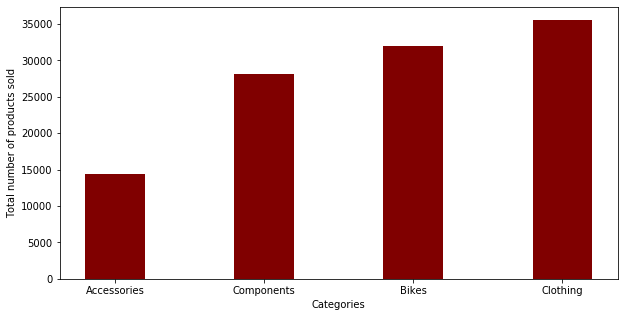

In [19]:
#Category
df=df.sort_values('OrderQuantity')
fig2 = plt.figure(figsize = (10, 5)) 
plt.bar(df.Category, df.OrderQuantity, color ='maroon', width = 0.4)
plt.xlabel("Categories") 
plt.ylabel("Total number of products sold")  
# show plot 
plt.show() 

**Analysis**:As can be observed from the charts, the highest number of products sold come from Clothing category followed by bikes then components and then Accessories with the least number of products sold.

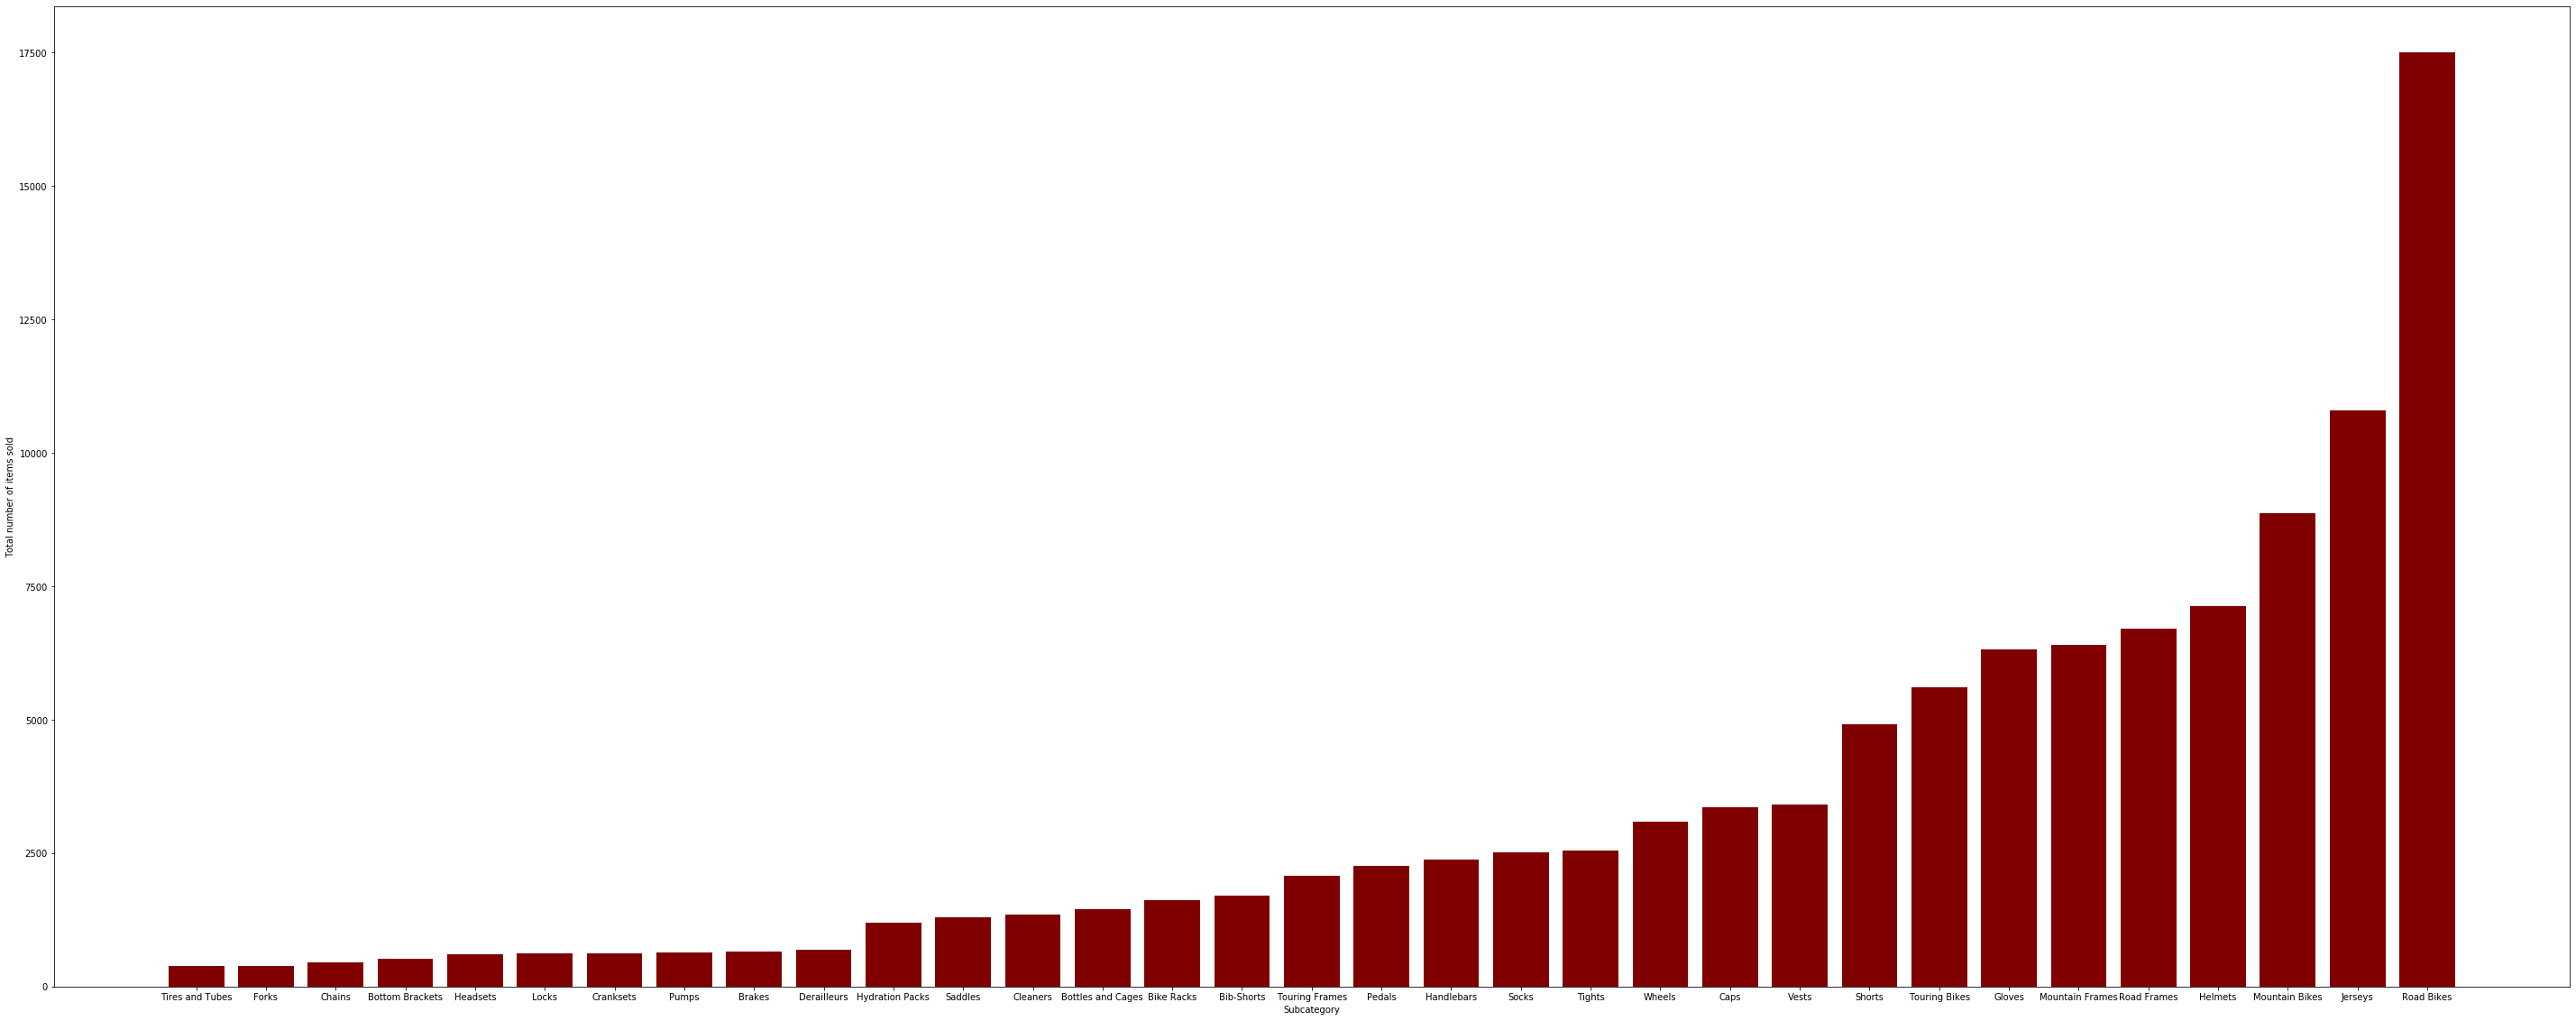

In [20]:
#subcategory
df = data.groupby(['Subcategory']).agg({'OrderQuantity':np.sum}).reset_index()
df=df.sort_values('OrderQuantity')
fig = plt.figure(figsize = (50, 20)) 
plt.bar(df.Subcategory, df.OrderQuantity, color ='maroon', width = 0.8)
plt.xlabel("Subcategory") 
plt.ylabel("Total number of items sold")  
# show plot 
plt.show() 

**Analysis**:If we zoom in we can observe that the sub category with highest number of products sold is Road Bikes followed by jerseys and then mountain bikes. The sub cetgories with the least number of products sold are tire tubes and forks.

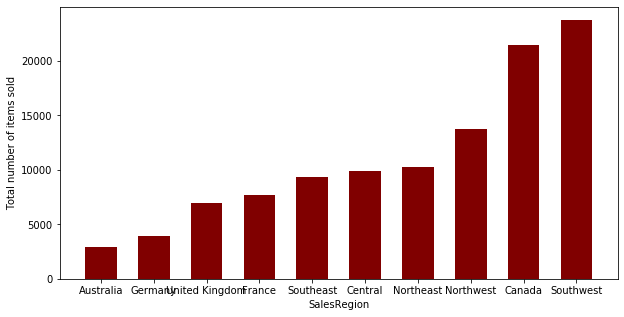

In [21]:
#Region
df = data.groupby(['SalesRegion']).agg({'OrderQuantity':np.sum}).reset_index().sort_values('OrderQuantity')
fig = plt.figure(figsize = (10, 5)) 
plt.bar(df.SalesRegion, df.OrderQuantity, color ='maroon', width = 0.6)
plt.xlabel("SalesRegion") 
plt.ylabel("Total number of items sold")  
# show plot 
plt.show() 

**Analysis**:Here we see the highest number of products sold are in Southwest, Canada and then Northwest whereas the least number of products sold are in Australia and European countries like Germany and UK.

Plot bar chart for promotions. You need to exclude 'No Discount' data while plotting bar chart.

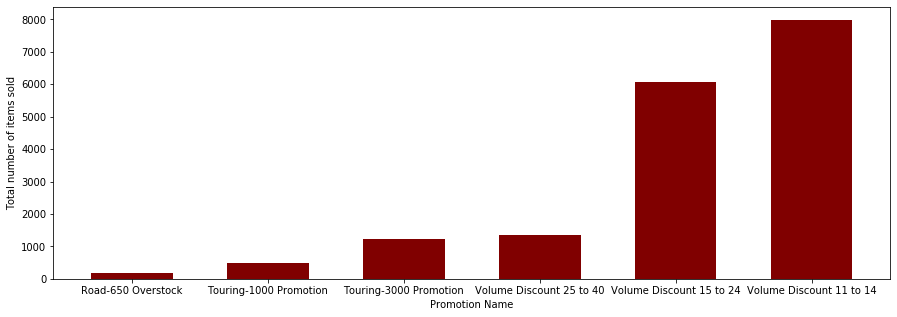

In [22]:
#Promotion
df = data.groupby(['PromotionName']).agg({'OrderQuantity':np.sum}).reset_index().sort_values('OrderQuantity')
#Filter data
#print(promotionData)
promotionData = df[df.PromotionName != 'No Discount']
#Plot bar chart
fig = plt.figure(figsize = (15, 5)) 
plt.bar(promotionData.PromotionName, promotionData.OrderQuantity, color ='maroon', width = 0.6)
plt.xlabel("Promotion Name") 
plt.ylabel("Total number of items sold")  
# show plot 
plt.show()

**Analysis**:Highest number of products sold are under the discount, 'Volume Discount 11 to 14' followed closely by 'Volume Discount 15 to 24' after which there is a stark decrease in products sold under discounts with least number of products sold under the discount 'Road-650 Overstock'.

Plot number of orders placed on each day of week. Is there any interesting trend?

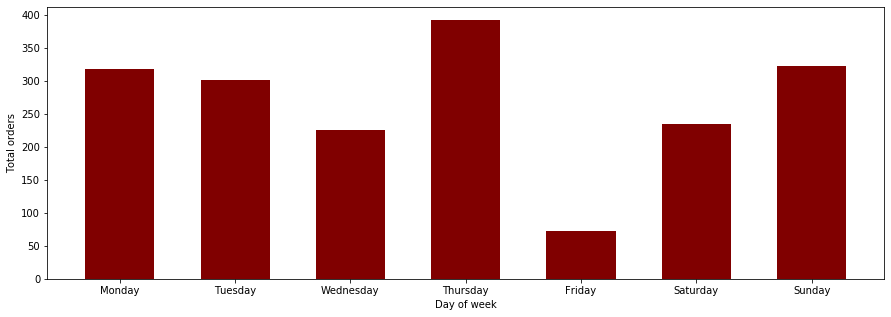

In [23]:
df = data.groupby(['Orderdate', 'OrderNumber']).size()
new_df = df.to_frame(name = 'size').reset_index()
new_df['NumberofOrders']=1
new_df['day_of_week'] = new_df['Orderdate'].dt.day_name()

dataSales = new_df.groupby('day_of_week')['NumberofOrders'].agg('sum').reset_index()
dataSales = dataSales.loc[[1,5,6,4,0,2,3], :]

# #plotting bar chart
fig = plt.figure(figsize = (15, 5)) 
plt.bar(dataSales.day_of_week, dataSales.NumberofOrders, color ='maroon', width = 0.6)
plt.xlabel("Day of week") 
plt.ylabel("Total orders") 
plt.show()


**Analysis**:There are more orders placed on weekdays than weekends with the highest number of orders being placed on Thursdays. The trend drops to the least number of orders plcaed on Friday after which it picks up on Saturday and Sunday.

Is there any impact of promotion on overall product sales?

Index(['PromotionName', 'OrderQuantity'], dtype='object')


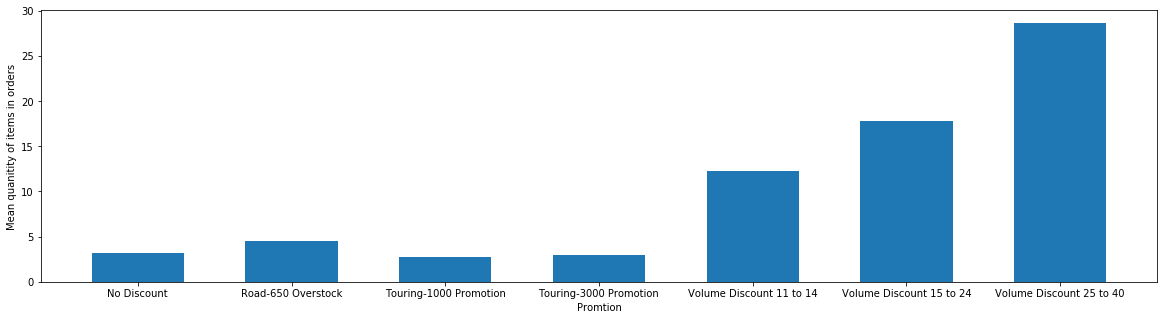

,PromotionName,OrderQuantity
0,No Discount,3.136119
1,Road-650 Overstock,4.567568
2,Touring-1000 Promotion,2.734463
3,Touring-3000 Promotion,3.019753
4,Volume Discount 11 to 14,12.302003
5,Volume Discount 15 to 24,17.818182
6,Volume Discount 25 to 40,28.638298


In [38]:
df = data.groupby(['OrderNumber','PromotionName']).agg({'OrderQuantity': ['sum']})
df_promo = data.groupby(['PromotionName'], as_index=False).agg({'OrderQuantity': ['mean']})
df_promo.columns = df_promo.columns.droplevel(1)
df_promo.head(10)
print(df_promo.columns)

#plot bar chart
fig = plt.figure(figsize = (20, 5))
plt.bar(df_promo.PromotionName, df_promo.OrderQuantity, align='center', width=0.6)
plt.xlabel("Promtion") 
plt.ylabel("Mean quanitity of items in orders") 
plt.show()
df_promo.head(10)

**Analysis**: As we can see, the number of average quanitites in an order increases overall when there is a promotion as compared to without any discount. We can also see discount 25 to 40 having most order quantities followed by vol 15 to 20 and then vol 11 to 14. Hence, promotions have a positive impact on product sales.

Insert a new column 'ProcessingDays' which is calculated as ShippedDate - OrderDate

In [25]:
data['ProcessingDays'] = (data['Shipdate']-data['Orderdate'])
data['ProcessingDays'] = data['ProcessingDays'].astype('timedelta64[D]').astype(int)
data.dtypes

OrderNumber               object
ProductName               object
Color                     object
Category                  object
Subcategory               object
ListPrice                float64
Orderdate         datetime64[ns]
Duedate           datetime64[ns]
Shipdate          datetime64[ns]
PromotionName             object
SalesRegion               object
OrderQuantity              Int64
UnitPrice                float64
SalesAmount              float64
DiscountAmount           float64
TaxAmount                float64
Freight                  float64
DueData                   object
ProcessingDays             int32
dtype: object

What is the average processing time? Are there deviations from that average? Draw boxplot of ProcessingDays to analyse. 
Do you see any outlier here?

In [27]:
df.head(20)
df = data.groupby(['OrderNumber'], sort=False).size().reset_index(name='Count')
df['Count'].describe()


count    1866.000000
mean       16.737942
std        16.411185
min         1.000000
25%         3.000000
50%        10.000000
75%        27.000000
max        68.000000
Name: Count, dtype: float64

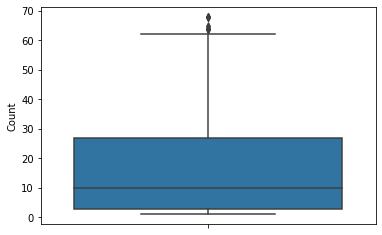

In [30]:
sns.boxplot(y= df['Count'])

**Analysis**:The above box plot shows that the median of the number of products in an order is 10 and the mean is 16.7 therefore we see the box plot positively skewed. The maximum number of products in an order are 68 and this is considered an outlier.  

Perform some other meaningful analysis on the data and present your findings.

## Normalization

Create a new column 'NormalizedPrice' that contains normalized ListPrice of products. Z-Score normalization will be performed.

In [31]:
#z-score normalization
data['NormalizedPrice'] = data.iloc[:,5:6].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
data.head(20)

,OrderNumber,ProductName,Color,Category,Subcategory,ListPrice,Orderdate,Duedate,Shipdate,PromotionName,SalesRegion,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight,DueData,ProcessingDays,NormalizedPrice
0,SO43843,"Mountain-100 Silver, 48",Silver,Bikes,Mountain Bikes,3399.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997,NaN,7,3.409273
1,SO43843,"Mountain-100 Black, 48",Black,Bikes,Mountain Bikes,3374.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2024.9940,4049.9880,0.0,323.9990,101.2497,NaN,7,3.378086
2,SO43843,"HL Mountain Frame - Silver, 46",Silver,Components,Mountain Frames,1204.3248,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297,NaN,7,0.670221
4,SO43843,"HL Mountain Frame - Silver, 38",Silver,Components,Mountain Frames,1204.3248,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,722.5949,1445.1898,0.0,115.6152,36.1297,NaN,7,0.670221
5,SO43843,"HL Mountain Frame - Silver, 48",Silver,Components,Mountain Frames,1364.5000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,1,818.7000,818.7000,0.0,65.4960,20.4675,NaN,7,0.870036
6,SO43843,"HL Mountain Frame - Black, 48",Black,Components,Mountain Frames,1349.6000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,1,809.7600,809.7600,0.0,64.7808,20.2440,NaN,7,0.851449
7,SO43843,"Mountain-100 Silver, 38",Silver,Bikes,Mountain Bikes,3399.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,2039.9940,4079.9880,0.0,326.3990,101.9997,NaN,7,3.409273
8,SO43843,"Mountain Bike Socks, M",White,Clothing,Socks,9.5000,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,2,5.7000,11.4000,0.0,0.9120,0.2850,NaN,7,-0.820302
9,SO43843,"Mountain-100 Black, 42",Black,Bikes,Mountain Bikes,3374.9900,2011-01-29,2011-02-10,2011-02-05,No Discount,Central,3,2024.9940,6074.9820,0.0,485.9986,151.8746,NaN,7,3.378086
14,SO43845,"LL Road Frame - Red, 44",Red,Components,Road Frames,306.5636,2011-01-29,2011-02-10,2011-02-05,No Discount,Southeast,1,183.9382,183.9382,0.0,14.7151,4.5985,NaN,7,-0.449720


Is product price following a normal distribution? Is it skewed? Plot histogram.

(array([13046.,  3629.,   462.,  3451.,  2353.,   906.,  1888.,   910.,
          552.,   443.,     0.,   798.,   959.,  1251.,     0.,     0.,
            0.,     0.,   199.,   386.]),
 array([1.32820000e+00, 1.08609890e+02, 2.15891580e+02, 3.23173270e+02,
        4.30454960e+02, 5.37736650e+02, 6.45018340e+02, 7.52300030e+02,
        8.59581720e+02, 9.66863410e+02, 1.07414510e+03, 1.18142679e+03,
        1.28870848e+03, 1.39599017e+03, 1.50327186e+03, 1.61055355e+03,
        1.71783524e+03, 1.82511693e+03, 1.93239862e+03, 2.03968031e+03,
        2.14696200e+03]),
 <a list of 20 Patch objects>)

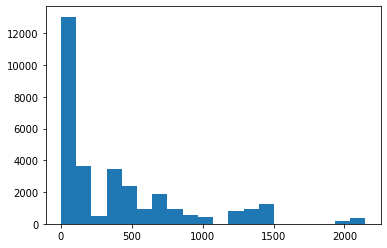

In [33]:
plt.hist(data.UnitPrice, bins=20)

**Analysis**:The histogram is not following a normal distribution, rather it is right-skewed.

Let's update UnitPrice by its log and then plot histogram. Is there any change?

(array([  90.,   12.,  239., 1302.,    0.,  272.,  938., 2535., 3457.,
        2223., 1825.,  153., 1114., 2821., 1780., 4180., 1840., 2859.,
        3008.,  585.]),
 array([0.28382464, 0.65322386, 1.02262309, 1.39202231, 1.76142153,
        2.13082076, 2.50021998, 2.8696192 , 3.23901842, 3.60841765,
        3.97781687, 4.34721609, 4.71661532, 5.08601454, 5.45541376,
        5.82481298, 6.19421221, 6.56361143, 6.93301065, 7.30240988,
        7.6718091 ]),
 <a list of 20 Patch objects>)

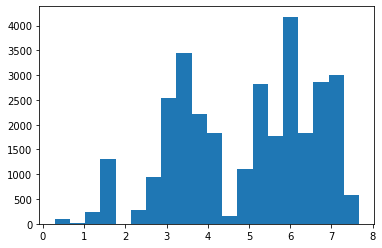

In [32]:
plt.hist(np.log(data.UnitPrice), bins=20)

**Analysis**:Now the histogram is a bit left-skewed now but the skew is much more gentle than before. 

Let's investigate if prices within categories are normally distributed and present your analysis.

0        7.620702
1        7.613322
2        6.582849
4        6.582849
5        6.707718
           ...   
32035    7.265739
32036    6.591550
32037    6.400832
32038    6.591550
32039    5.298577
Name: UnitPrice, Length: 31233, dtype: float64

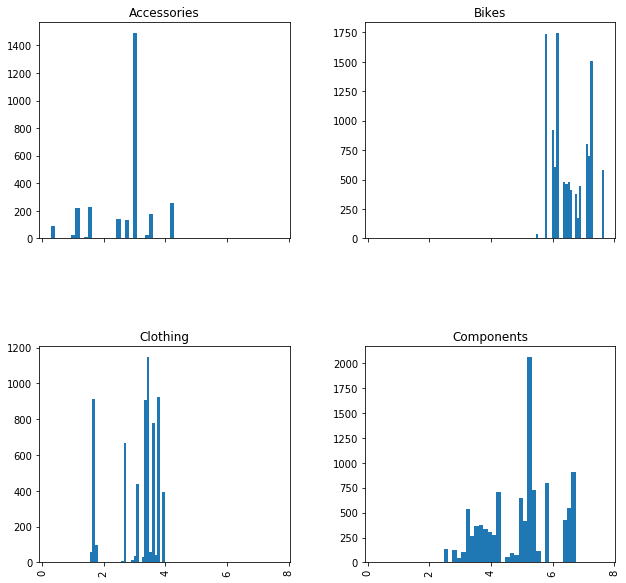

In [34]:
plot_test=np.log(data.UnitPrice).hist(by=data['Category'],sharex=True,figsize=(10,10), bins=30)  
np.log(data.UnitPrice)

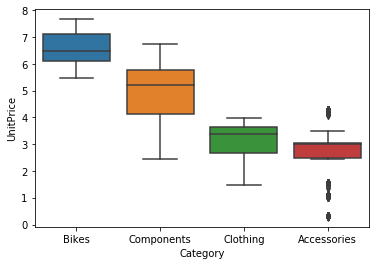

In [39]:
sns.boxplot(y= np.log(data.UnitPrice), x = data['Category'])

**Analysis**:The bikes and components data are to some extent normally distributed as can be seen from the box plots but components is slightly left-skewed. The Accessories data is heavily skewed and also has many outliers, whereas clothing is negatively skewed.

Product prices are on a continuous scale. You want to descritize them. User KBinDiscretizer to find boundaries using:
- equal bin discretization 
- equal frequency discretization
- kmeans discretization

Which one do you think is better?

In [35]:
#Equal-bin
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
X= data.iloc[:,12:13]
X_binned = enc.fit_transform(X)

print('Original Data:\n',X.head(20))
print('Bin edges:\n',enc.bin_edges_)
print('Descritized Data:\n', X_binned[0:20,:])


Original Data:
     UnitPrice
0   2039.9940
1   2024.9940
2    722.5949
4    722.5949
5    818.7000
6    809.7600
7   2039.9940
8      5.7000
9   2024.9940
14   183.9382
15    28.8404
16   419.4589
17   419.4589
18   419.4589
19   874.7940
20   419.4589
21  2146.9620
22   183.9382
23     5.1865
24   183.9382
Bin edges:
 [array([1.32820000e+00, 4.30454960e+02, 8.59581720e+02, 1.28870848e+03,
       1.71783524e+03, 2.14696200e+03])]
Descritized Data:
 [[4.]
 [4.]
 [1.]
 [1.]
 [1.]
 [1.]
 [4.]
 [0.]
 [4.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [2.]
 [0.]
 [4.]
 [0.]
 [0.]
 [0.]]


In [36]:
#Equal- Frequesncy
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X= data.iloc[:,12:13]
X_binned = enc.fit_transform(X)

print('Original Data:\n',X.head(20))
print('Bin edges:\n',enc.bin_edges_)
print('Descritized Data:\n', X_binned[0:20,:])

Original Data:
     UnitPrice
0   2039.9940
1   2024.9940
2    722.5949
4    722.5949
5    818.7000
6    809.7600
7   2039.9940
8      5.7000
9   2024.9940
14   183.9382
15    28.8404
16   419.4589
17   419.4589
18   419.4589
19   874.7940
20   419.4589
21  2146.9620
22   183.9382
23     5.1865
24   183.9382
Bin edges:
 [array([1.328200e+00, 2.884040e+01, 7.200000e+01, 3.340575e+02,
       7.289100e+02, 2.146962e+03])]
Descritized Data:
 [[4.]
 [4.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [0.]
 [4.]
 [2.]
 [1.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [2.]
 [0.]
 [2.]]


In [37]:
#Kmeans
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
X= data.iloc[:,12:13]
X_binned = enc.fit_transform(X)

print('Original Data:\n',X.head(20))
print('Bin edges:\n',enc.bin_edges_)
print('Descritized Data:\n', X_binned[0:20,:])


Original Data:
     UnitPrice
0   2039.9940
1   2024.9940
2    722.5949
4    722.5949
5    818.7000
6    809.7600
7   2039.9940
8      5.7000
9   2024.9940
14   183.9382
15    28.8404
16   419.4589
17   419.4589
18   419.4589
19   874.7940
20   419.4589
21  2146.9620
22   183.9382
23     5.1865
24   183.9382
Bin edges:
 [array([1.32820000e+00, 2.47831080e+02, 6.09701293e+02, 1.07743506e+03,
       1.71513604e+03, 2.14696200e+03])]
Descritized Data:
 [[4.]
 [4.]
 [2.]
 [2.]
 [2.]
 [2.]
 [4.]
 [0.]
 [4.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [4.]
 [0.]
 [0.]
 [0.]]


**Analysis**: K-means does discretization best as can be seen it divides the data set into most expensive, medium expensive, less expensive and then reasonable priced and cheap categories. 
When we compare these bins to our dataset's ProductPrices, this categorization of prices works very well as from \\$600-2147. lie most of the bikes, and the 3 categorizations can give us a good idea of which are the most expensive bikes and which ones are more reasonable.
Then we have a bin from price range \\$247-609 which consist of most of the products from components category. 
And lastly we have the bin with price range \\$1.32-247 which consists of cheaper items like clothes and accessories. 

### Correlation:
Study correlation between attributes via:
- correlation coefficients
- scatter plot matrix
- plotting heatmap

You can focus on numeric attributes for this.

In [40]:
#correlation coefficients
df = data.drop('ProcessingDays', 1)
df = df.drop('NormalizedPrice', 1)
corr_matrix = df.corr()
cor_target=corr_matrix
cor_target

,ListPrice,OrderQuantity,UnitPrice,SalesAmount,DiscountAmount,TaxAmount,Freight
ListPrice,1.000000,-0.229128,0.996780,0.769445,0.111123,0.769445,0.769445
OrderQuantity,-0.229128,1.000000,-0.230318,0.096628,0.111333,0.096628,0.096628
UnitPrice,0.996780,-0.230318,1.000000,0.772700,0.048769,0.772700,0.772700
SalesAmount,0.769445,0.096628,0.772700,1.000000,0.110071,1.000000,1.000000
DiscountAmount,0.111123,0.111333,0.048769,0.110071,1.000000,0.110071,0.110071
TaxAmount,0.769445,0.096628,0.772700,1.000000,0.110071,1.000000,1.000000
Freight,0.769445,0.096628,0.772700,1.000000,0.110071,1.000000,1.000000


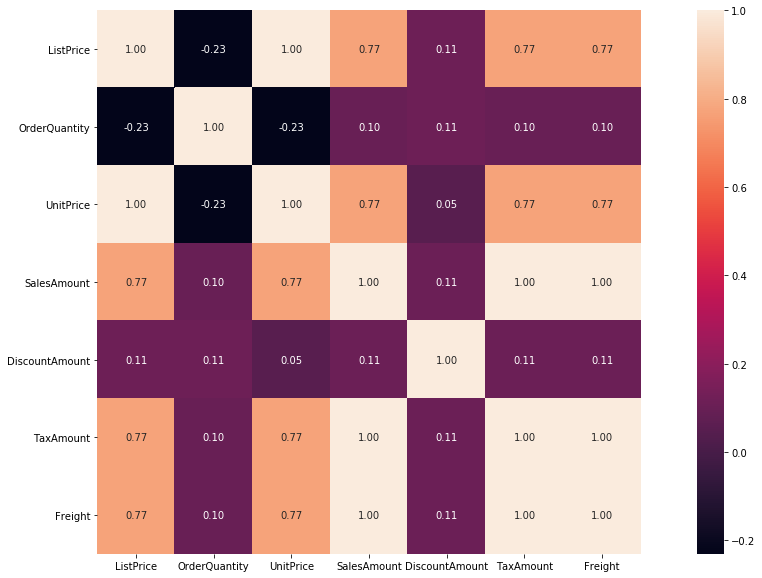

In [42]:
#Heatmap
df = data.drop('ProcessingDays', 1)
df = df.drop('NormalizedPrice', 1)
corrmat =df.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,square=True,annot=True, fmt='.2f')

**Analysis**:<br>
List Price and Unit Price are positively correlated. If we analyze our data, we can see that the unit price is always approximately 0.6x the List Price.  
Sales amount, tax amount and freight charges are also positively correlated with one another. If we analyze our data, we can see that the tax amount is always 8% of the Sales amount and the freight is 2.5% of the Sales amount.  
<br>
The sales amount also has a positive corelation with Unit Price and ListPrice as the higher the prices of individual products, the more the total sales amount.
<br>
Unit Price and Order Quantity have a negative correlation although it is not very strong. The negative correlation would make sense as the higher the price, the lower the quantity of products you would buy.